### Ackonwledgements 

A lot of what I have learnt of Python started here - 
 - Course taught at LDEO by Ryan Abernathey : https://github.com/rabernat/python_teaching
 - Course notes from a data science taught at NYU : https://github.com/kmunger/DataScienceCourse

#### Why use python instead of Matlab? 

Main reason is that it is free and opensource. So what you can accomplish is limitless! 
Go read more here - http://www.pyzo.org/python_vs_matlab.html 

Also, never need a reason to learn a new tool. *Might* also make you more marketable in the industry.

## What is Jupyter notebook? 

"The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more." 
http://jupyter.org/

It is basically like an IDE that runs on your browser. You can add complicated comments, and the outputs are presented inline. 

#### How to make it work?
http://jupyter.org/install.html
Having Python is a requirement. So you can either 

 - Download the jupyter using Anaconda. 
 - If you already have Python installed, then install it using 'pip'. 
 
Once you have it installed, you can run it from your terminal as 

jupyter notebook

And then work from a broswer. It's that simple. You can also run it on a server!!! (WOW!!!, no more ugly vim... phew.)

*Running it on Prince at NYU - *

https://wikis.nyu.edu/display/NYUHPC/Running+Jupyter+on+Prince 
The basic steps : 
   - get the script. 
   - run the script using sbatch. 
   - get the link from log file. 
   - run in browser.

#### Now that I have a horse, what do I do with it? 

Run. ... 
I mean literally, run your code! 

Let me show you how to walk. 

### The earthquake example

In [77]:
# Shamlessly copy example from Ryan's slides, with slight modifications 

# let's get data of all earthquakes in this month. 
import os 

if ~os.system("wget https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"):
    print "Got the earthquake data for the last 30 days from - \n https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
else:
    print "There was an error, check for problem manually."

Got the earthquake data for the last 30 days from - 
 https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv


In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import time
from mpl_toolkits.basemap import Basemap, cm

%matplotlib inline

In [7]:
ds = pd.read_csv('all_month.csv',parse_dates = ['time',], index_col='time')

In [8]:
ds.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
2017-11-13 20:19:06.950,38.824333,-122.765167,0.82,0.56,md,7.0,135.0,NaN,0.01,nc,...,2017-11-13T20:22:00.237Z,"3km W of Cobb, California",earthquake,0.62,0.82,0.180,4.0,automatic,nc,nc
2017-11-13 20:18:36.770,36.632999,-121.248665,4.46,1.32,md,8.0,187.0,0.05751,0.08,nc,...,2017-11-13T20:27:02.846Z,"22km NE of Gonzales, California",earthquake,0.73,1.69,0.280,5.0,automatic,nc,nc
2017-11-13 20:04:05.880,46.010167,-112.460000,-2.00,1.70,ml,7.0,142.0,0.06700,0.05,mb,...,2017-11-13T20:19:47.600Z,"5km E of Butte, Montana",quarry blast,0.51,31.61,0.219,4.0,reviewed,mb,mb
2017-11-13 19:59:38.250,37.605835,-118.817337,3.15,0.70,md,8.0,171.0,0.01834,0.01,nc,...,2017-11-13T20:10:03.803Z,"14km ESE of Mammoth Lakes, California",earthquake,0.71,1.03,0.210,6.0,automatic,nc,nc
2017-11-13 19:51:56.210,37.190666,-120.816666,12.18,2.13,md,7.0,122.0,0.49300,0.16,nc,...,2017-11-13T20:26:36.559Z,"14km NNE of Los Banos, California",earthquake,0.90,2.07,NaN,1.0,automatic,nc,nc


In [10]:
ds.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8955.000000,8955.000000,8955.000000,8953.000000,5368.000000,6195.000000,6139.000000,8953.000000,5344.000000,8953.000000,6069.000000,6127.000000
mean,41.818085,-117.587390,22.404007,1.473298,19.901080,118.681708,0.461334,0.289828,1.623548,4.166399,0.177677,17.799902
std,18.246746,57.394440,49.532920,1.134110,16.628687,66.680630,1.652608,0.277218,3.110843,100.750780,0.142198,32.835418
min,-60.102900,-179.971300,-3.320000,-0.590000,0.000000,13.000000,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.964166,-148.957850,3.795000,0.760000,9.000000,69.000000,0.021180,0.080000,0.257500,0.400000,0.100000,5.000000
50%,38.486167,-118.993833,7.700000,1.200000,15.000000,103.000000,0.062410,0.170000,0.410000,0.700000,0.152000,10.000000
75%,59.359450,-116.790333,15.585000,1.800000,25.000000,155.305000,0.165000,0.460000,0.910000,1.840000,0.220000,20.000000
max,86.893200,179.961000,634.330000,7.300000,164.000000,357.000000,21.993000,1.810000,40.900000,8713.400000,4.120000,608.000000


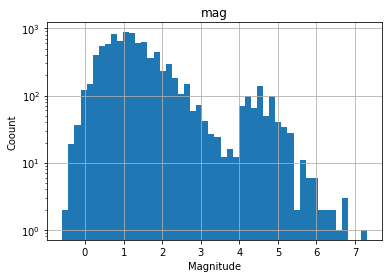

In [81]:
gb = ds.groupby('mag')
ds.hist('mag', bins=50)
ax = plt.gca()
ax.set_yscale('log')
plt.xlabel('Magnitude')
plt.ylabel('Coount')

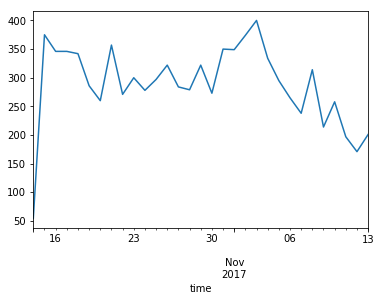

In [84]:
ds.groupby(pd.TimeGrouper('1d'), axis=0)['mag'].count().plot()

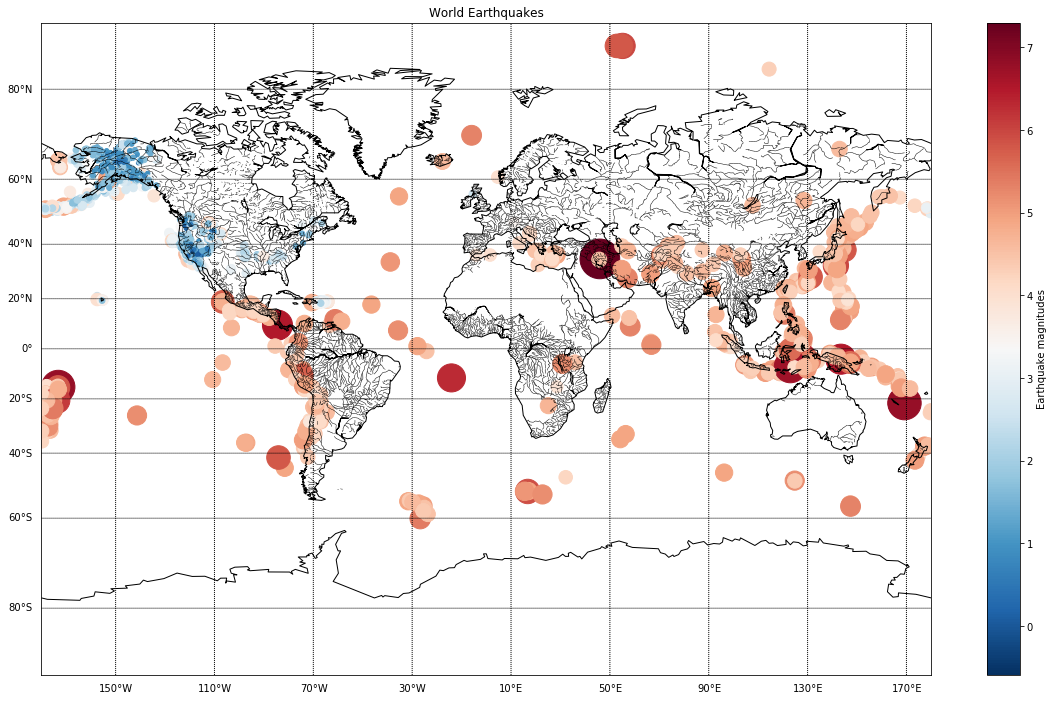

In [87]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
#m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
#            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m = Basemap(projection='mill', ax = ax)

m.drawcoastlines()
parallels = np.arange(-80,90,20.)
m.drawparallels(parallels,labels=[True,False,False,True])
meridians = np.arange(10.,351.,40.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawrivers()
#m.drawcountries()
#m.fillcontinents(color='0.95')
x, y = m(ds.longitude.values, ds.latitude.values)
s = ax.scatter(x, y, c =ds.mag, s=2**(ds['mag'])*10, cmap='RdBu_r')
r = fig.colorbar(s)
r.set_label('Earthquake magnitudes')
plt.title('World Earthquakes')

#### You get the point! 

#### You can get really facny if you like. 
Make the above map interactive with Bokeh.

In [148]:
from matplotlib.colors import Colormap
from matplotlib.cm import ScalarMappable
# bokeh version
from bokeh.plotting import figure, show, output_notebook
output_notebook()

from bokeh.models import ColumnDataSource, HoverTool

Loading BokehJS ...

In [153]:
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,"

p = figure(tools=TOOLS, title = "Earthquakes", width=900, height=500,)
p.xaxis.axis_label = 'lon'
p.yaxis.axis_label = 'lat'

sm = ScalarMappable(cmap='Greens')
rgb = (255*sm.to_rgba(ds['mag'].values)[:,:3]).astype('int')
#colors = rgb
colors = ["#%02x%02x%02x" % tuple(c) for c in rgb]

source = ColumnDataSource(data=ds)




p.scatter(ds['longitude'], ds['latitude'], radius = 1.9**ds['mag']/10,
        fill_alpha=0.9, line_color=None, source=source)

p.add_tools(HoverTool(tooltips=[("Place", "@place"),("Magnitude","@mag"),("Type","@type")]))

show(p)

/home/dbalwada/.conda/envs/dhruvenv/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/home/dbalwada/.conda/envs/dhruvenv/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/home/dbalwada/.conda/envs/dhruvenv/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
